<a href="https://colab.research.google.com/github/anabraghim/Trabalho-2-de-Intelig-ncia-Artificial/blob/main/trabalho_2_IA_anabraghim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho 2


# 1. Preparação dos dados



1.   Remoção de textos vazios ou duplicados
2.   Conversão dos rótulos para números
3. Dividir os dados em treino (70%), validação (15%) e teste (15%).



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

csv_url = "https://docs.google.com/spreadsheets/d/17aHYyRNfbmde8bVOR_HX_BmNUEdkygPuaGO4lJj26jg/export?format=csv&gid=0"

df = pd.read_csv(csv_url)

print("Shape inicial:", df.shape)
df.head()

Shape inicial: (4569, 8)


,video,onca,caseiro,fake news,ironia,notícia,Conservacionistas,comment_text
0,video0,neutro,neutro,não,sim,neutra,NaN,Solta no congresso
1,video0,neutro,neutro,não,não,boa,NaN,"vídeo direto, respeitoso, sem sensacionalismo ..."
2,video0,neutro,neutro,não,não,boa,NaN,Essa reportagem foi a melhor parabéns
3,video0,neutro,negativo,não,não,neutra,NaN,As patas 🐾 das onças no chão foi um aviso pra ...
4,video0,neutro,negativo,não,não,neutra,NaN,Se o cara viu que onça estava rondando a casa ...


In [ ]:
# Escolher as três classes
df = df[["onca", "caseiro", "notícia", "comment_text"]]


print("Shape após seleção de classes:", df.shape)
df.head()


Shape após seleção de classes: (4569, 4)


,onca,caseiro,notícia,comment_text
0,neutro,neutro,neutra,Solta no congresso
1,neutro,neutro,boa,"vídeo direto, respeitoso, sem sensacionalismo ..."
2,neutro,neutro,boa,Essa reportagem foi a melhor parabéns
3,neutro,negativo,neutra,As patas 🐾 das onças no chão foi um aviso pra ...
4,neutro,negativo,neutra,Se o cara viu que onça estava rondando a casa ...


In [ ]:
# Remover duplicatas
df = df.drop_duplicates(subset=["comment_text"])

# Remover linhas com textos vazios
df = df[df['comment_text'] != ""]

print("Shape após limpeza:", df.shape)
df.head()

Shape após limpeza: (4495, 4)


,onca,caseiro,notícia,comment_text
0,neutro,neutro,neutra,Solta no congresso
1,neutro,neutro,boa,"vídeo direto, respeitoso, sem sensacionalismo ..."
2,neutro,neutro,boa,Essa reportagem foi a melhor parabéns
3,neutro,negativo,neutra,As patas 🐾 das onças no chão foi um aviso pra ...
4,neutro,negativo,neutra,Se o cara viu que onça estava rondando a casa ...


In [ ]:
# 5. Criando dicionários de conversão

# onça e caseiro têm valores: negativo / neutro / positivo
sentiment_map = {
    'negativo': 0,
    'neutro': 1,
    'positivo': 2
}

# noticias tem valores: ruim / neutra / boa
noticia_map = {
    'ruim': 0,
    'neutra': 1,
    'boa': 2
}

# 6. Apliquei as conversões
df['onca'] = df['onca'].map(sentiment_map)
df['caseiro'] = df['caseiro'].map(sentiment_map)
df['notícia'] = df['notícia'].map(noticia_map)

# 7. Remove linhas que ficaram com valores inválidos após o mapeamento
df = df.dropna()

print("Shape após limpeza:", df.shape)
# Mostrar resultado final
df.head()


Shape após limpeza: (4495, 4)


,onca,caseiro,notícia,comment_text
0,1,1,1,Solta no congresso
1,1,1,2,"vídeo direto, respeitoso, sem sensacionalismo ..."
2,1,1,2,Essa reportagem foi a melhor parabéns
3,1,0,1,As patas 🐾 das onças no chão foi um aviso pra ...
4,1,0,1,Se o cara viu que onça estava rondando a casa ...


In [ ]:
from sklearn.model_selection import train_test_split

# Primeiro: treino (70%) e o restante (30%)
train_df, temp_df = train_test_split(df, test_size=0.30, random_state=42, shuffle=True)

# Segundo: dividir o restante (30%) em validação (15%) e teste (15%)
val_df, test_df = train_test_split(temp_df, test_size=0.50, random_state=42, shuffle=True)

# Mostrar os tamanhos
print("Tamanho treino:", len(train_df))
print("Tamanho validação:", len(val_df))
print("Tamanho teste:", len(test_df))

Tamanho treino: 3146
Tamanho validação: 674
Tamanho teste: 675


# 2. Tokenização



1.   neuralmind/bert-base-portuguese-cased
2.   Gerar tensores de input_ids e attention_mask.



In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("neuralmind/bert-base-portuguese-cased")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
def tokenize_batch(text_list):
    return tokenizer(
        text_list,                     # lista de textos
        padding=True,                  # adiciona padding
        truncation=True,               # corta textos muito longos
        max_length=128,                # tamanho padrão para BERT
        return_tensors="pt"            # retorna tensores do PyTorch
    )


In [ ]:
train_tokens = tokenize_batch(train_df['comment_text'].tolist())

train_df['input_ids'] = train_tokens['input_ids'].tolist()
train_df['attention_mask'] = train_tokens['attention_mask'].tolist()


In [ ]:
val_tokens = tokenize_batch(val_df['comment_text'].tolist())

val_df['input_ids'] = val_tokens['input_ids'].tolist()
val_df['attention_mask'] = val_tokens['attention_mask'].tolist()


In [ ]:
test_tokens = tokenize_batch(test_df['comment_text'].tolist())

test_df['input_ids'] = test_tokens['input_ids'].tolist()
test_df['attention_mask'] = test_tokens['attention_mask'].tolist()


# 3. Configuração do modelo



1.   Configurar o número de classes conforme os rótulos (ex.: 3)
2.   Adaptar o modelo para obter o token [CLS] que será utilizado para o treinamento do modelo.



In [ ]:
import torch
import torch.nn as nn
from transformers import AutoModel

class BertClassifier(nn.Module):
    def __init__(self):
        super(BertClassifier, self).__init__()

        self.bert = AutoModel.from_pretrained("neuralmind/bert-base-portuguese-cased")

        # Agora são 9 saídas → 3 classes para cada coluna
        self.classifier = nn.Linear(768, 9)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        cls_embedding = outputs.last_hidden_state[:, 0, :]
        logits = self.classifier(cls_embedding)

        return logits



# 4. Treinamento

1. Usar AdamW com lr=2e-5 e epochs=10;
2. Mostrar o loss e a acurácia de treino e de validação por época.
3. Após a última época, mostrar o gráfico de evolução do loss do treino e da validação.


In [ ]:
from torch.utils.data import Dataset, DataLoader

class CommentsDataset(Dataset):
    def __init__(self, df, tokenizer):
        self.texts = df['comment_text'].tolist()
        self.labels = df[['onca', 'caseiro', 'notícia']].values
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        text = self.texts[idx]
        encoded = self.tokenizer(
            text,
            padding='max_length',
            truncation=True,
            max_length=128,
            return_tensors='pt'
        )

        input_ids = encoded['input_ids'].squeeze(0)
        attention_mask = encoded['attention_mask'].squeeze(0)

        labels = torch.tensor(self.labels[idx], dtype=torch.long)

        return {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "labels": labels
        }

train_dataset = CommentsDataset(train_df, tokenizer)
val_dataset   = CommentsDataset(val_df, tokenizer)
test_dataset  = CommentsDataset(test_df, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=16, shuffle=False)



========== ÉPOCA 1/10 ==========
Train Loss: 0.4716 | Val Loss: 0.3712
Train Acc:  0.8317 | Val Acc:  0.8614

========== ÉPOCA 2/10 ==========
Train Loss: 0.3016 | Val Loss: 0.3521
Train Acc:  0.8886 | Val Acc:  0.8706

========== ÉPOCA 3/10 ==========
Train Loss: 0.1850 | Val Loss: 0.3874
Train Acc:  0.9378 | Val Acc:  0.8769

========== ÉPOCA 4/10 ==========
Train Loss: 0.1001 | Val Loss: 0.4944
Train Acc:  0.9716 | Val Acc:  0.8600

========== ÉPOCA 5/10 ==========
Train Loss: 0.0561 | Val Loss: 0.5063
Train Acc:  0.9838 | Val Acc:  0.8677

========== ÉPOCA 6/10 ==========
Train Loss: 0.0320 | Val Loss: 0.5436
Train Acc:  0.9935 | Val Acc:  0.8711

========== ÉPOCA 7/10 ==========
Train Loss: 0.0217 | Val Loss: 0.5812
Train Acc:  0.9961 | Val Acc:  0.8668

========== ÉPOCA 8/10 ==========
Train Loss: 0.0245 | Val Loss: 0.6116
Train Acc:  0.9941 | Val Acc:  0.8735

========== ÉPOCA 9/10 ==========
Train Loss: 0.0157 | Val Loss: 0.6025
Train Acc:  0.9972 | Val Acc:  0.8711

=========

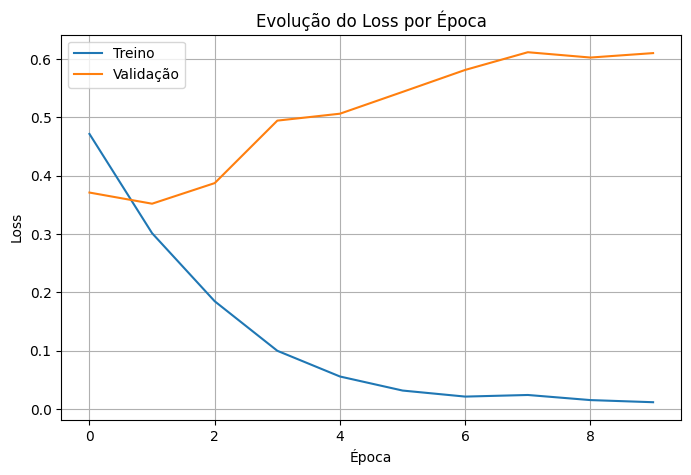

In [ ]:
# 4. Treinamento
# 1. Usar AdamW com lr=2e-5 e epochs=10;
# 2. Mostrar o loss e a acurácia de treino e de validação por época.
# 3. Após a última época, mostrar o gráfico de evolução do loss do treino e da validação.

import torch
import torch.nn as nn
from torch.optim import AdamW
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertClassifier().to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)
ce_loss = nn.CrossEntropyLoss()

epochs = 10

# Para armazenar histórico
train_losses = []
val_losses   = []
train_accs   = []
val_accs     = []

def calcular_acuracia(logits, labels):
    """Calcula acurácia média considerando as 3 tarefas."""
    logits_onca    = logits[:, 0:3]
    logits_caseiro = logits[:, 3:6]
    logits_noticia = logits[:, 6:9]

    preds_onca    = torch.argmax(logits_onca, dim=1)
    preds_caseiro = torch.argmax(logits_caseiro, dim=1)
    preds_noticia = torch.argmax(logits_noticia, dim=1)

    y_onca    = labels[:, 0]
    y_caseiro = labels[:, 1]
    y_noticia = labels[:, 2]

    acc_onca    = accuracy_score(y_onca.cpu(), preds_onca.cpu())
    acc_caseiro = accuracy_score(y_caseiro.cpu(), preds_caseiro.cpu())
    acc_noticia = accuracy_score(y_noticia.cpu(), preds_noticia.cpu())

    return (acc_onca + acc_caseiro + acc_noticia) / 3


for epoch in range(epochs):

    print(f"\n========== ÉPOCA {epoch+1}/{epochs} ==========")

    # -------------------------
    # TREINO
    # -------------------------
    model.train()
    total_loss = 0
    total_acc  = 0

    for batch in train_loader:

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        optimizer.zero_grad()

        logits = model(input_ids, attention_mask)

        # Separar blocos
        logits_onca    = logits[:, 0:3]
        logits_caseiro = logits[:, 3:6]
        logits_noticia = logits[:, 6:9]

        y_onca    = labels[:, 0]
        y_caseiro = labels[:, 1]
        y_noticia = labels[:, 2]

        loss_onca    = ce_loss(logits_onca, y_onca)
        loss_caseiro = ce_loss(logits_caseiro, y_caseiro)
        loss_noticia = ce_loss(logits_noticia, y_noticia)

        loss = (loss_onca + loss_caseiro + loss_noticia) / 3

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_acc  += calcular_acuracia(logits, labels)

    avg_train_loss = total_loss / len(train_loader)
    avg_train_acc  = total_acc  / len(train_loader)

    train_losses.append(avg_train_loss)
    train_accs.append(avg_train_acc)

    # -------------------------
    # VALIDAÇÃO
    # -------------------------
    model.eval()
    val_loss = 0
    val_acc  = 0

    with torch.no_grad():
        for batch in val_loader:

            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            logits = model(input_ids, attention_mask)

            logits_onca    = logits[:, 0:3]
            logits_caseiro = logits[:, 3:6]
            logits_noticia = logits[:, 6:9]

            y_onca    = labels[:, 0]
            y_caseiro = labels[:, 1]
            y_noticia = labels[:, 2]

            loss_onca    = ce_loss(logits_onca, y_onca)
            loss_caseiro = ce_loss(logits_caseiro, y_caseiro)
            loss_noticia = ce_loss(logits_noticia, y_noticia)

            loss = (loss_onca + loss_caseiro + loss_noticia) / 3

            val_loss += loss.item()
            val_acc  += calcular_acuracia(logits, labels)

    avg_val_loss = val_loss / len(val_loader)
    avg_val_acc  = val_acc  / len(val_loader)

    val_losses.append(avg_val_loss)
    val_accs.append(avg_val_acc)

    # Mostrar infos da época
    print(f"Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")
    print(f"Train Acc:  {avg_train_acc:.4f} | Val Acc:  {avg_val_acc:.4f}")

# -----------------------------------------
# GRÁFICO FINAL DE LOSS
# -----------------------------------------

plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Treino")
plt.plot(val_losses, label="Validação")
plt.title("Evolução do Loss por Época")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


# 5. Avaliação

1. Avaliar no conjunto de teste;
2. Utilizando o classification score do sklearn, mostrar os valores de precision, recall e F1 para cada classe
3. Mostrar exemplos de erros (textos que o modelo classificou errado).


In [ ]:
from sklearn.metrics import classification_report

model.eval()

all_preds_onca = []
all_preds_caseiro = []
all_preds_noticia = []

all_true_onca = []
all_true_caseiro = []
all_true_noticia = []

raw_texts = test_df['comment_text'].tolist()

with torch.no_grad():
    for batch in test_loader:

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        logits = model(input_ids, attention_mask)

        # Separar blocos
        logits_onca    = logits[:, 0:3]
        logits_caseiro = logits[:, 3:6]
        logits_noticia = logits[:, 6:9]

        preds_onca    = torch.argmax(logits_onca, dim=1).cpu().numpy()
        preds_caseiro = torch.argmax(logits_caseiro, dim=1).cpu().numpy()
        preds_noticia = torch.argmax(logits_noticia, dim=1).cpu().numpy()

        y_onca    = labels[:, 0].cpu().numpy()
        y_caseiro = labels[:, 1].cpu().numpy()
        y_noticia = labels[:, 2].cpu().numpy()

        all_preds_onca.extend(preds_onca)
        all_preds_caseiro.extend(preds_caseiro)
        all_preds_noticia.extend(preds_noticia)

        all_true_onca.extend(y_onca)
        all_true_caseiro.extend(y_caseiro)
        all_true_noticia.extend(y_noticia)


# ========= Classification Report =========

print("\n=== MÉTRICAS POR CLASSE — ONÇA ===")
print(classification_report(all_true_onca, all_preds_onca, digits=4))

print("\n=== MÉTRICAS POR CLASSE — CASEIRO ===")
print(classification_report(all_true_caseiro, all_preds_caseiro, digits=4))

print("\n=== MÉTRICAS POR CLASSE — NOTÍCIA ===")
print(classification_report(all_true_noticia, all_preds_noticia, digits=4))


print("\n===== EXEMPLOS DE ERROS =====")

rotulos_sent = {0: "negativo", 1: "neutro", 2: "positivo"}
rotulos_noticia = {0: "ruim", 1: "neutra", 2: "boa"}

erro_count = 0

for i in range(len(all_true_onca)):
    if (all_true_onca[i] != all_preds_onca[i]) or \
       (all_true_caseiro[i] != all_preds_caseiro[i]) or \
       (all_true_noticia[i] != all_preds_noticia[i]):

        print("\nTexto:", raw_texts[i])
        print("   ONÇA:    true =", rotulos_sent[all_true_onca[i]],
              " | pred =", rotulos_sent[all_preds_onca[i]])
        print("   CASEIRO: true =", rotulos_sent[all_true_caseiro[i]],
              " | pred =", rotulos_sent[all_preds_caseiro[i]])
        print("   NOTÍCIA: true =", rotulos_noticia[all_true_noticia[i]],
              " | pred =", rotulos_noticia[all_preds_noticia[i]])

        erro_count += 1
        if erro_count >= 5:
            break



=== MÉTRICAS POR CLASSE — ONÇA ===
              precision    recall  f1-score   support

           0     0.6250    0.5217    0.5687       115
           1     0.8585    0.8986    0.8781       513
           2     0.5238    0.4681    0.4944        47

    accuracy                         0.8044       675
   macro avg     0.6691    0.6295    0.6471       675
weighted avg     0.7954    0.8044    0.7987       675


=== MÉTRICAS POR CLASSE — CASEIRO ===
              precision    recall  f1-score   support

           0     0.5909    0.2653    0.3662        49
           1     0.9169    0.9617    0.9388       574
           2     0.6667    0.6538    0.6602        52

    accuracy                         0.8874       675
   macro avg     0.7248    0.6269    0.6551       675
weighted avg     0.8740    0.8874    0.8757       675


=== MÉTRICAS POR CLASSE — NOTÍCIA ===
              precision    recall  f1-score   support

           0     0.7045    0.5254    0.6019        59
           1   

# Exemplos
1. Execução da classificação de textos de pelo menos três textos.

In [ ]:
# ======== Função de predição ========

import torch

def prever_texto(texto, model, tokenizer, device):
    model.eval()  # modo de avaliação

    # Tokenizar o texto
    tokens = tokenizer(
        [texto],
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )

    input_ids = tokens["input_ids"].to(device)
    attention_mask = tokens["attention_mask"].to(device)

    # Passar pelo modelo
    with torch.no_grad():
        logits = model(input_ids, attention_mask)

    # Separar as 3 saídas
    logits_onca    = logits[:, 0:3]
    logits_caseiro = logits[:, 3:6]
    logits_noticia = logits[:, 6:9]

    # Pegar classe com maior probabilidade
    pred_onca    = torch.argmax(logits_onca, dim=1).item()
    pred_caseiro = torch.argmax(logits_caseiro, dim=1).item()
    pred_noticia = torch.argmax(logits_noticia, dim=1).item()

    # Converter números de volta para rótulos
    sentimento_inv = {0: "negativo", 1: "neutro", 2: "positivo"}
    noticia_inv    = {0: "ruim", 1: "neutra", 2: "boa"}

    return {
        "onca": sentimento_inv[pred_onca],
        "caseiro": sentimento_inv[pred_caseiro],
        "notícia": noticia_inv[pred_noticia]
    }

# ======== EXEMPLOS DE USO COM 3 TEXTOS DISTINTOS ========

textos = [
    "nossa que reportagem maravilhosa tão top",        # esperado positivo
    "essa onça está perigosa e feia",        # esperado negativo
    "o vídeo foi interessante, mas sem graça" # esperado neutro
]

for t in textos:
    resultado = prever_texto(t, model, tokenizer, device)
    print(f"\nTexto: {t}")
    print("Predição:", resultado)



Texto: nossa que reportagem maravilhosa tão top
Predição: {'onca': 'neutro', 'caseiro': 'neutro', 'notícia': 'boa'}

Texto: essa onça está perigosa e feia
Predição: {'onca': 'negativo', 'caseiro': 'neutro', 'notícia': 'neutra'}

Texto: o vídeo foi interessante, mas sem graça
Predição: {'onca': 'neutro', 'caseiro': 'neutro', 'notícia': 'ruim'}
